In [2]:
import pandas as pd
#loading dataset
file_path= r"C:\Users\LENOVO\Desktop\heart.csv"
df=pd.read_csv(file_path)
#Data inspection 
print("\n Head details")
print(df.head())
print("\n Column names")
print(df.columns)


 Head details
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
1   53    1   0       140   203    1        0      155      1      3.1      0   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
4   62    0   0       138   294    1        1      106      0      1.9      1   

   ca  thal  target  
0   2     3       0  
1   0     3       0  
2   0     3       0  
3   1     3       0  
4   3     2       0  

 Column names
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')


In [5]:
import numpy as np

print("Initial dataset information:")
print(df.info())
print(df.describe())

# Handling missing data
# Option 1: Drop rows with missing values
df_cleaned = df.dropna()

# Option 2: Fill missing values with the mean (for numerical columns)
df_cleaned = df.fillna(df.mean())

# Handling outliers
#  Removing outliers using the IQR method
Q1 = df_cleaned.quantile(0.25)
Q3 = df_cleaned.quantile(0.75)
IQR = Q3 - Q1

# Defining  range for filtering out outliers
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

# Filtering the outliers
df_cleaned = df_cleaned[~((df_cleaned < lower_bound) | (df_cleaned > upper_bound)).any(axis=1)]




Initial dataset information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1025 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1025 non-null   int64  
 1   sex       1025 non-null   int64  
 2   cp        1025 non-null   int64  
 3   trestbps  1025 non-null   int64  
 4   chol      1025 non-null   int64  
 5   fbs       1025 non-null   int64  
 6   restecg   1025 non-null   int64  
 7   thalach   1025 non-null   int64  
 8   exang     1025 non-null   int64  
 9   oldpeak   1025 non-null   float64
 10  slope     1025 non-null   int64  
 11  ca        1025 non-null   int64  
 12  thal      1025 non-null   int64  
 13  target    1025 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 112.2 KB
None
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     

In [6]:
#Data inspection after cleaning
print("\n Head details")
print(df_cleaned.head())
print("\n Column names")
print(df_cleaned.columns)
print("Initial dataset information:")
print(df_cleaned.info())
print(df_cleaned.describe())


 Head details
   age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  slope  \
0   52    1   0       125   212    0        1      168      0      1.0      2   
2   70    1   0       145   174    0        1      125      1      2.6      0   
3   61    1   0       148   203    0        1      161      0      0.0      2   
5   58    0   0       100   248    0        0      122      0      1.0      1   
7   55    1   0       160   289    0        0      145      1      0.8      1   

   ca  thal  target  
0   2     3       0  
2   0     3       0  
3   1     3       0  
5   0     2       1  
7   1     3       0  

 Column names
Index(['age', 'sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach',
       'exang', 'oldpeak', 'slope', 'ca', 'thal', 'target'],
      dtype='object')
Initial dataset information:
<class 'pandas.core.frame.DataFrame'>
Index: 769 entries, 0 to 1024
Data columns (total 14 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------


Statistical Summary:
               age          sex           cp     trestbps        chol  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.00000   
mean     54.434146     0.695610     0.942439   131.611707   246.00000   
std       9.072290     0.460373     1.029641    17.516718    51.59251   
min      29.000000     0.000000     0.000000    94.000000   126.00000   
25%      48.000000     0.000000     0.000000   120.000000   211.00000   
50%      56.000000     1.000000     1.000000   130.000000   240.00000   
75%      61.000000     1.000000     2.000000   140.000000   275.00000   
max      77.000000     1.000000     3.000000   200.000000   564.00000   

               fbs      restecg      thalach        exang      oldpeak  \
count  1025.000000  1025.000000  1025.000000  1025.000000  1025.000000   
mean      0.149268     0.529756   149.114146     0.336585     1.071512   
std       0.356527     0.527878    23.005724     0.472772     1.175053   
min       0.000000     0

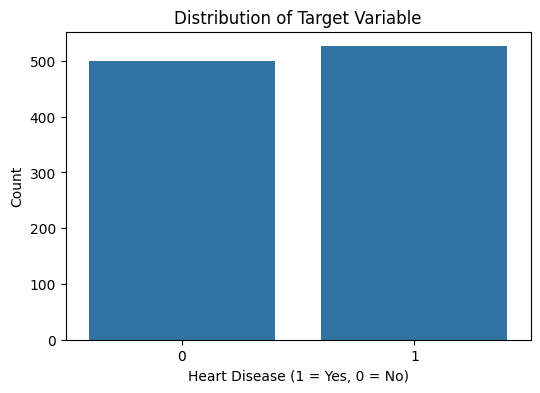

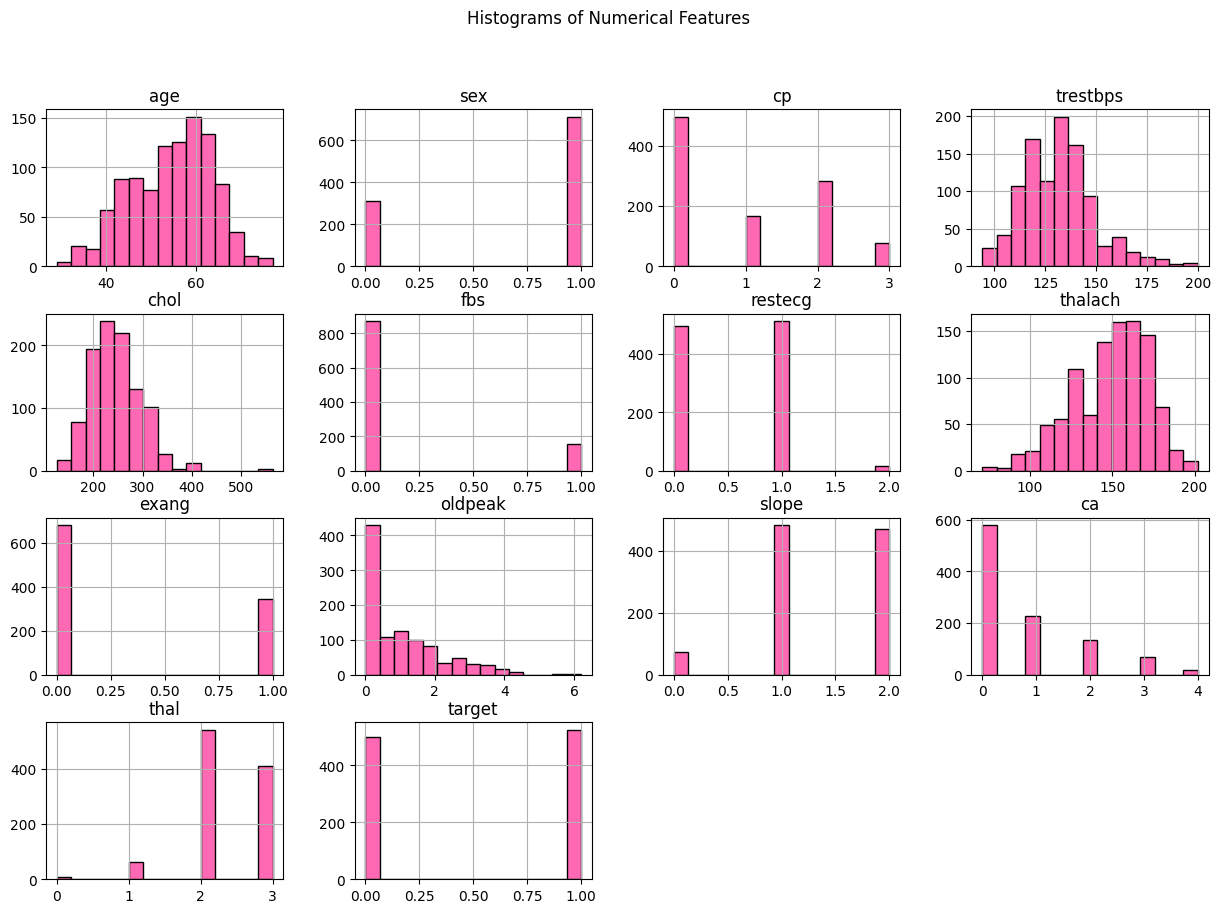

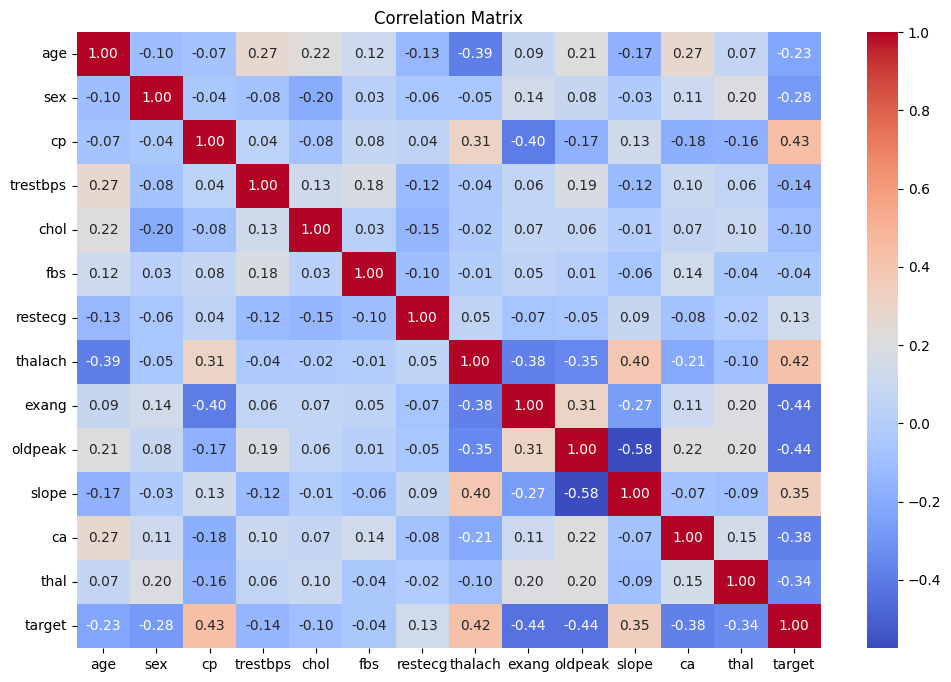

In [11]:
#Exploratory Data Analysis(EDA)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Statistical summary of the dataset
print("\nStatistical Summary:")
print(df.describe())

# Check for missing values
print("\nMissing values in each column:")
print(df.isnull().sum())

# Distribution of target variable (Assuming 'target' is the label for heart disease occurrence)
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df)
plt.title('Distribution of Target Variable')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# Histograms for each numerical feature
df.hist(bins=15, figsize=(15, 10), color='hotpink', edgecolor='black')
plt.suptitle('Histograms of Numerical Features')
plt.show()

# Correlation matrix to see relationships between variables
plt.figure(figsize=(12,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()





C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


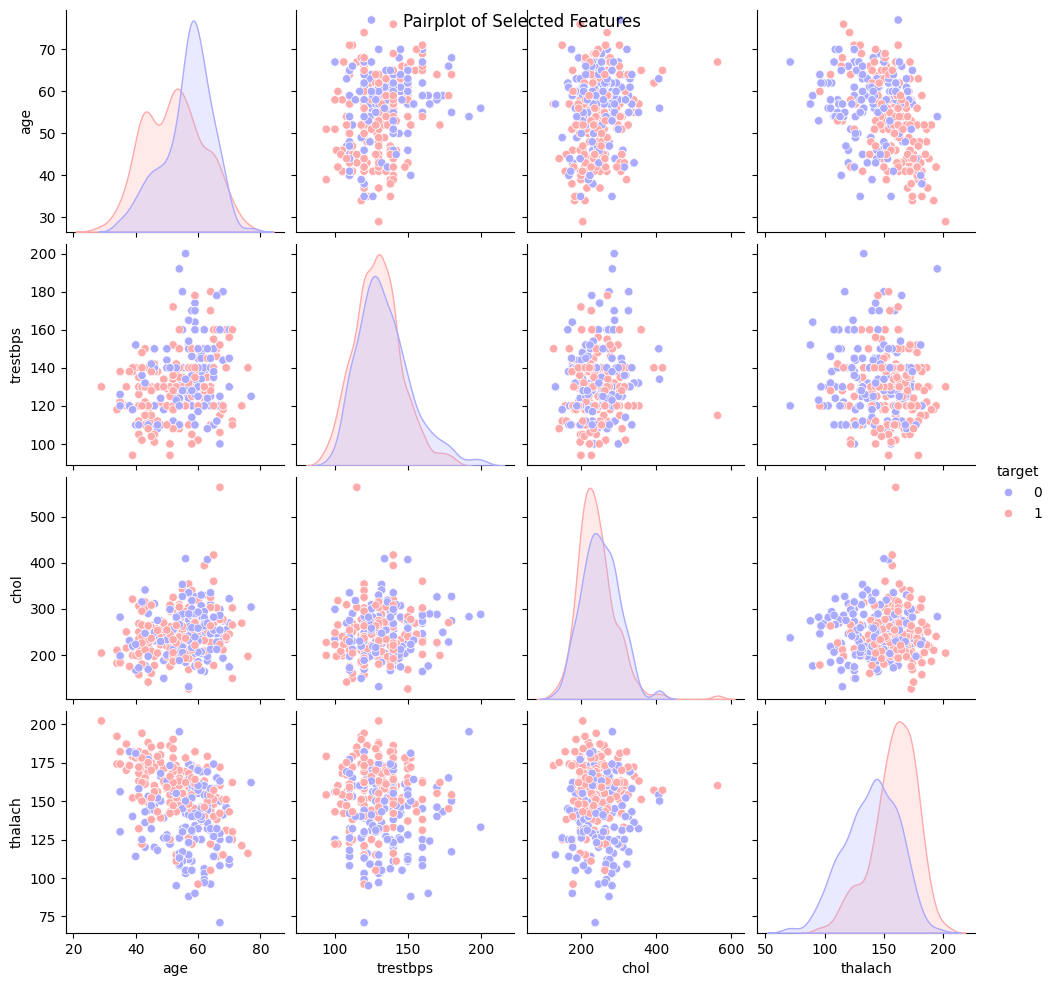

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11128\3019365775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11128\3019365775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11128\3019365775.py:11: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y=feature, data=df, palette='Set2')
C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11128\3019365

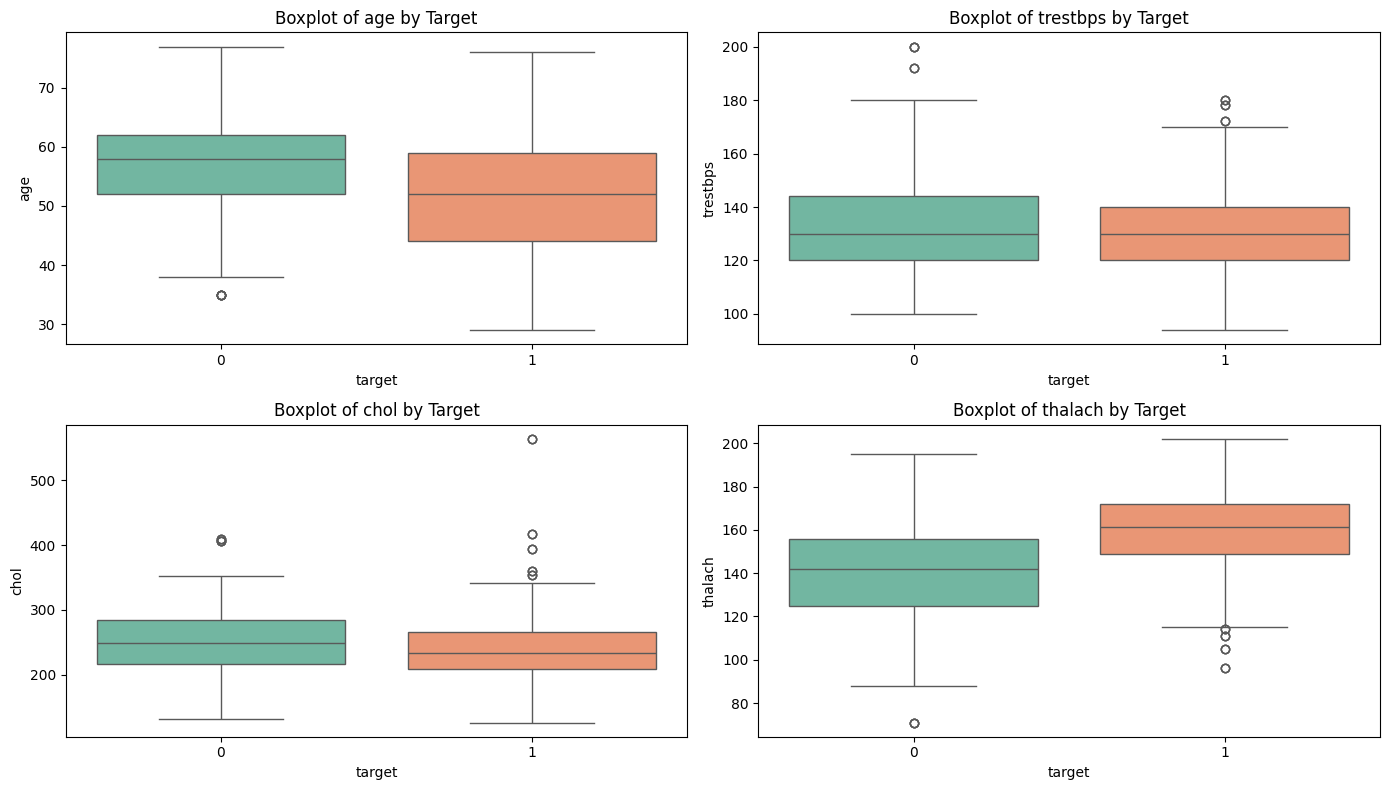

In [9]:
# Pairplot to observe relationships between selected pairs of variables
selected_features = ['age', 'trestbps', 'chol', 'thalach', 'target']
sns.pairplot(df[selected_features], hue='target', palette='bwr')
plt.suptitle('Pairplot of Selected Features')
plt.show()

# Boxplots to observe the distribution and outliers in selected features
plt.figure(figsize=(14, 8))
for i, feature in enumerate(selected_features[:-1]):
    plt.subplot(2, 2, i+1)
    sns.boxplot(x='target', y=feature, data=df, palette='Set2')
    plt.title(f'Boxplot of {feature} by Target')
plt.tight_layout()
plt.show()

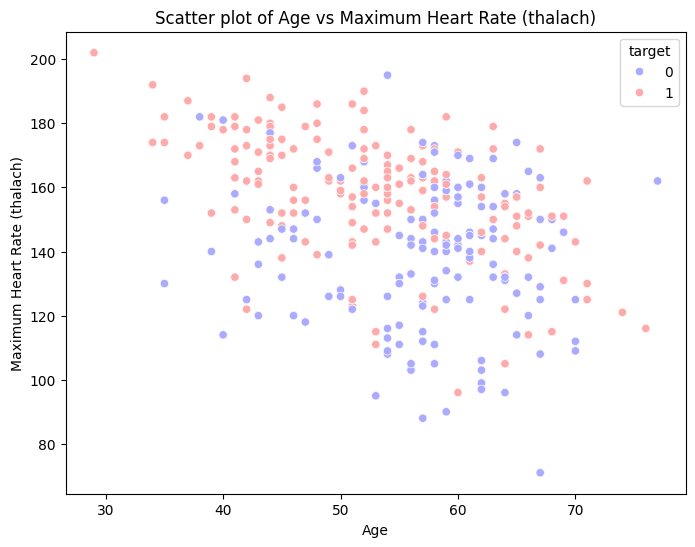

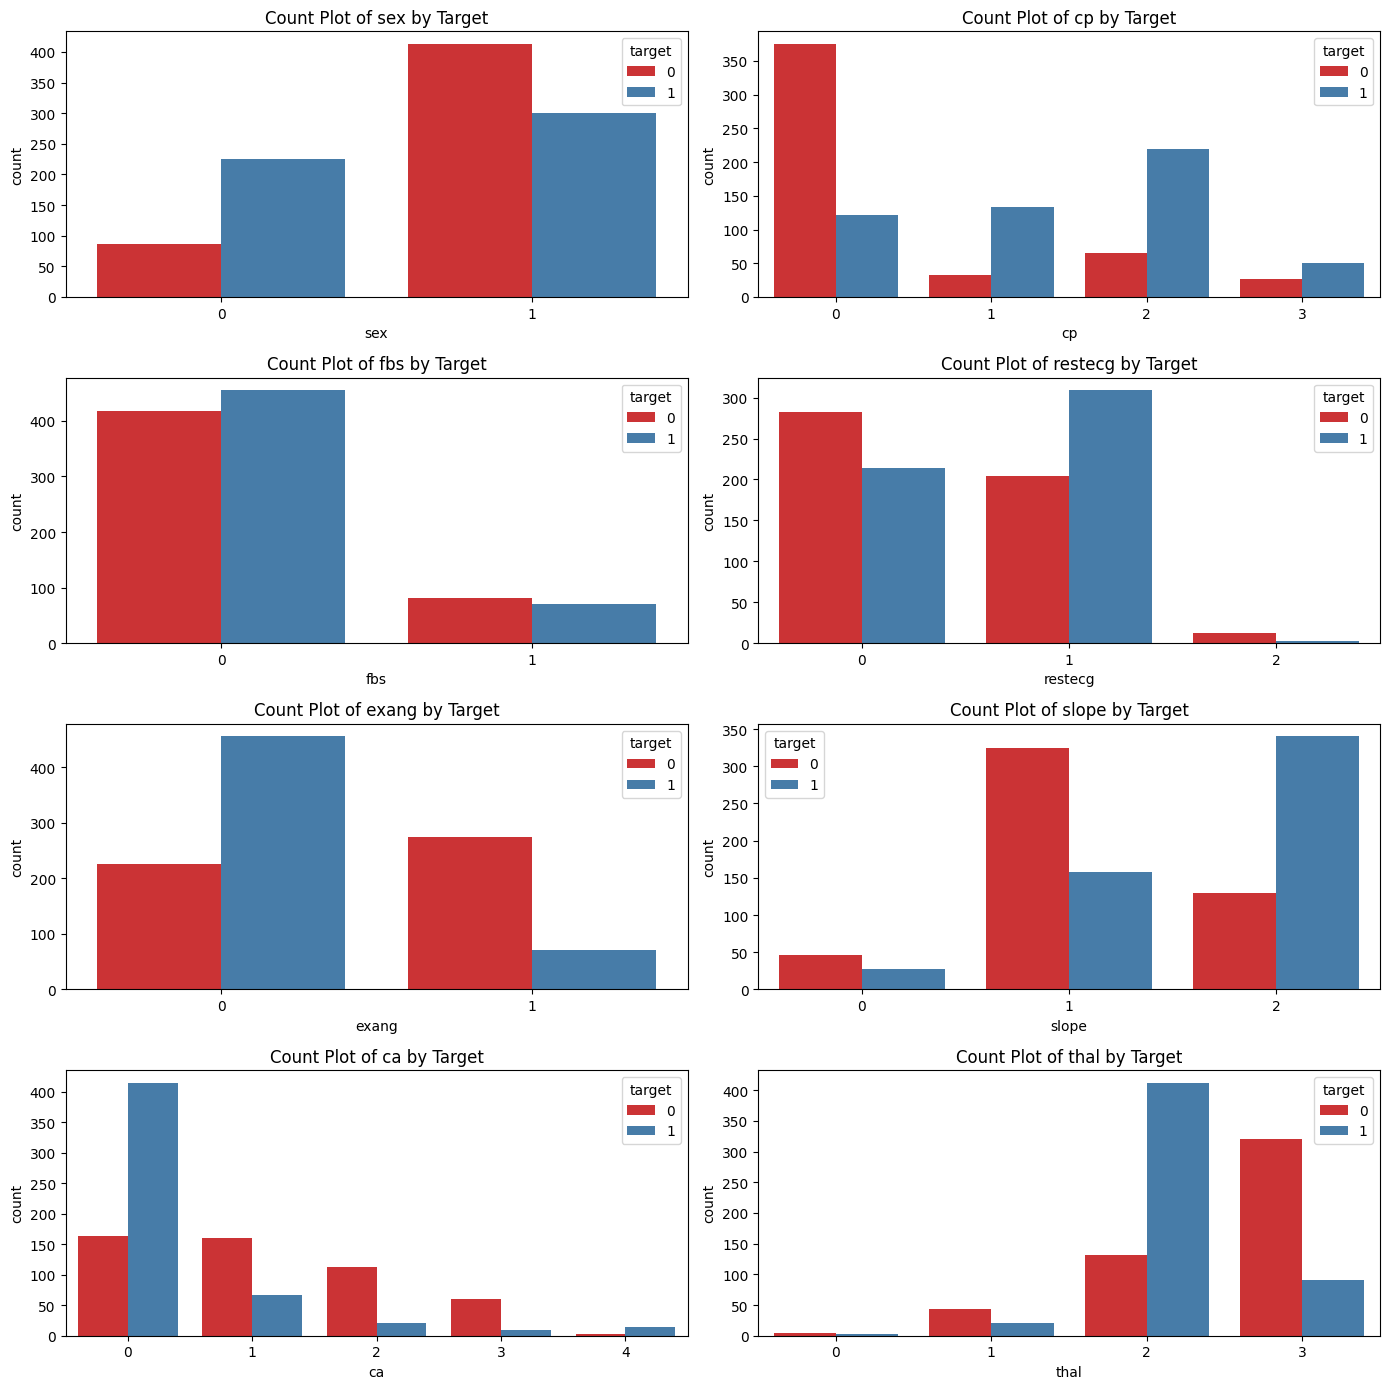

In [8]:
# Scatter plot for age vs maximum heart rate (thalach) colored by target
plt.figure(figsize=(8, 6))
sns.scatterplot(x='age', y='thalach', hue='target', data=df, palette='bwr')
plt.title('Scatter plot of Age vs Maximum Heart Rate (thalach)')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.show()

# Count plots for categorical variables
categorical_features = ['sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
plt.figure(figsize=(14, 14))
for i, feature in enumerate(categorical_features):
    plt.subplot(4, 2, i+1)
    sns.countplot(x=feature, hue='target', data=df, palette='Set1')
    plt.title(f'Count Plot of {feature} by Target')
plt.tight_layout()
plt.show()

Average age of patients with heart disease: 52.41 years
Average age of patients without heart disease: 56.57 years
Average cholesterol level in patients with heart disease: 240.98 mg/dL
Average cholesterol level in patients without heart disease: 251.29 mg/dL


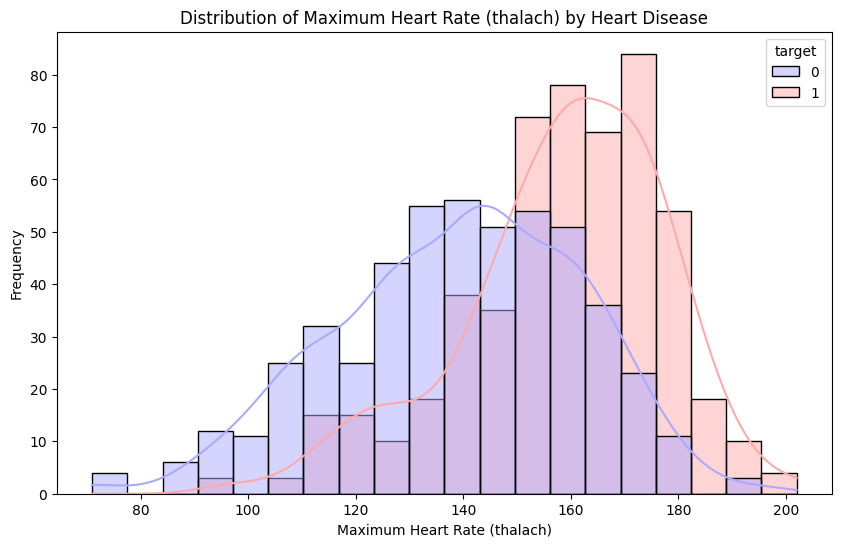

The most common chest pain type among patients with heart disease is type: 2
Percentage of patients with heart disease having fasting blood sugar > 120 mg/dL: 13.50%
Correlation between age and maximum heart rate (thalach): -0.39
The gender more prone to heart disease is: Male


In [12]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns


# 1. What is the average age of patients with and without heart disease?
average_age_heart_disease = df[df['target'] == 1]['age'].mean()
average_age_no_heart_disease = df[df['target'] == 0]['age'].mean()
print(f"Average age of patients with heart disease: {average_age_heart_disease:.2f} years")
print(f"Average age of patients without heart disease: {average_age_no_heart_disease:.2f} years")

# 2. Is there a significant difference in cholesterol levels between patients with and without heart disease?
average_chol_heart_disease = df[df['target'] == 1]['chol'].mean()
average_chol_no_heart_disease = df[df['target'] == 0]['chol'].mean()
print(f"Average cholesterol level in patients with heart disease: {average_chol_heart_disease:.2f} mg/dL")
print(f"Average cholesterol level in patients without heart disease: {average_chol_no_heart_disease:.2f} mg/dL")

# 3. What is the distribution of the maximum heart rate (thalach) in patients with and without heart disease?
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='thalach', hue='target', kde=True, bins=20, palette='bwr')
plt.title('Distribution of Maximum Heart Rate (thalach) by Heart Disease')
plt.xlabel('Maximum Heart Rate (thalach)')
plt.ylabel('Frequency')
plt.show()

# 4. Which chest pain type (cp) is most common among patients with heart disease?
most_common_cp_heart_disease = df[df['target'] == 1]['cp'].value_counts().idxmax()
print(f"The most common chest pain type among patients with heart disease is type: {most_common_cp_heart_disease}")

# 5. What percentage of patients with heart disease have fasting blood sugar > 120 mg/dL (fbs)?
fbs_high_heart_disease = df[(df['target'] == 1) & (df['fbs'] == 1)].shape[0]
total_heart_disease = df[df['target'] == 1].shape[0]
percentage_fbs_high = (fbs_high_heart_disease / total_heart_disease) * 100
print(f"Percentage of patients with heart disease having fasting blood sugar > 120 mg/dL: {percentage_fbs_high:.2f}%")

# 6. How does age correlate with maximum heart rate (thalach)?
correlation_age_thalach = df['age'].corr(df['thalach'])
print(f"Correlation between age and maximum heart rate (thalach): {correlation_age_thalach:.2f}")

# 7. Which gender (sex) is more prone to heart disease?
gender_heart_disease = df[df['target'] == 1]['sex'].value_counts()
if gender_heart_disease.idxmax() == 1:
    gender_more_prone = "Male"
else:
    gender_more_prone = "Female"
print(f"The gender more prone to heart disease is: {gender_more_prone}")


C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11128\2790607608.py:9: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='target', data=df, palette='Set2')


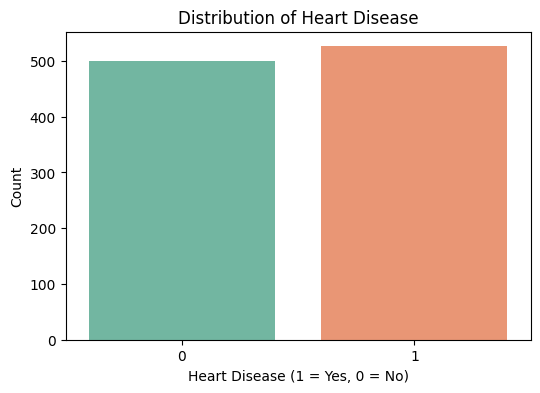

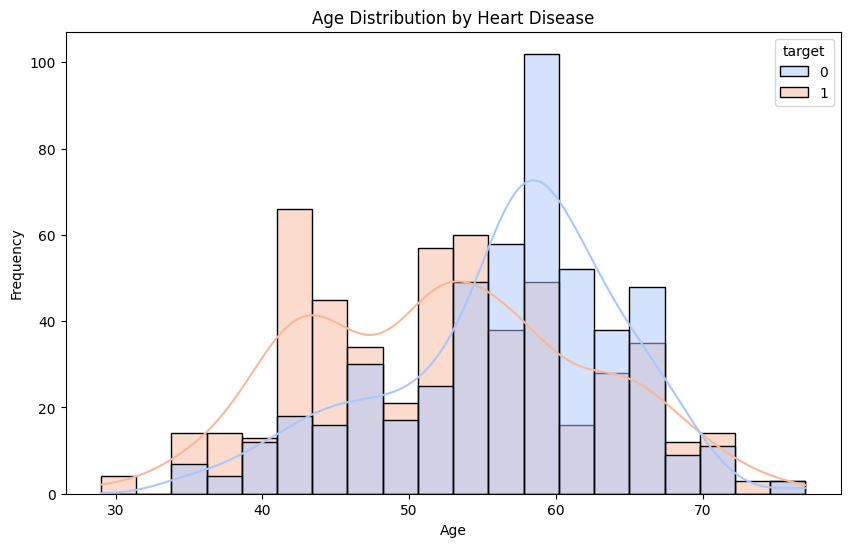

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11128\2790607608.py:25: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='chol', data=df, palette='Set3')


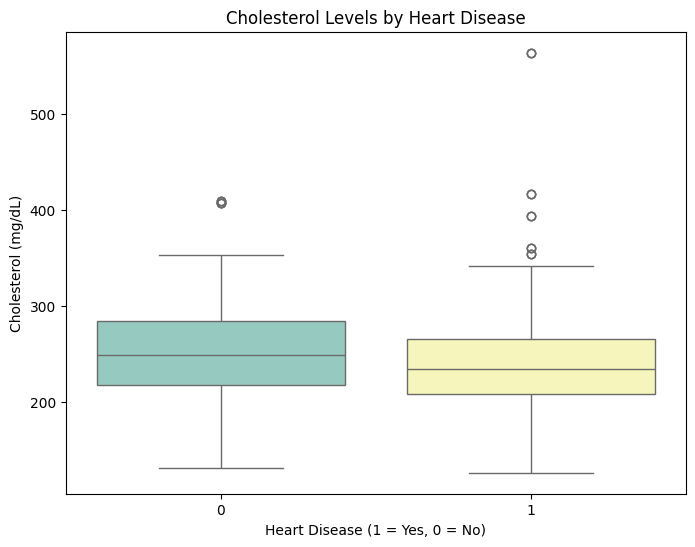

C:\Users\LENOVO\AppData\Local\Programs\Python\Python311\Lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


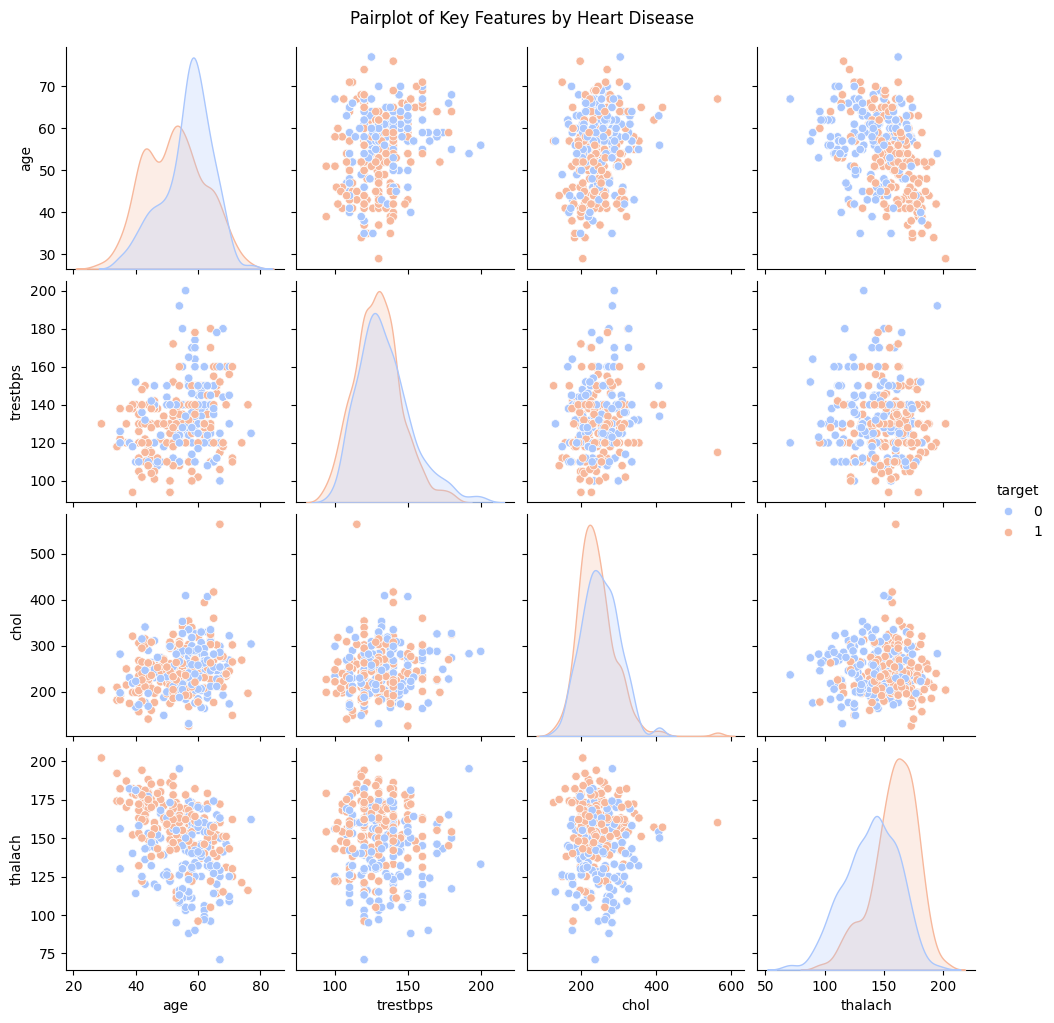

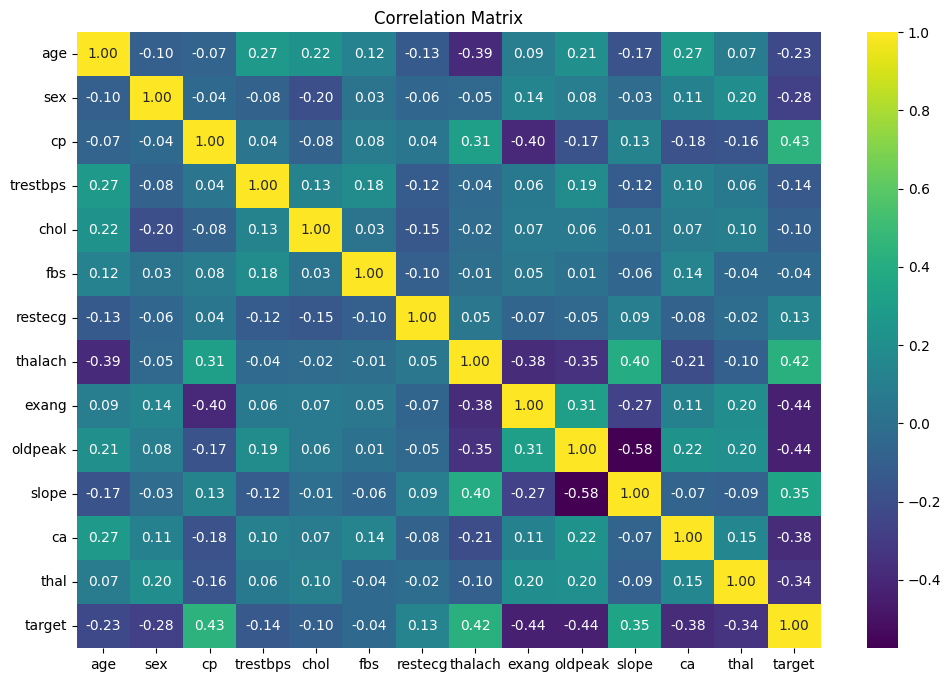

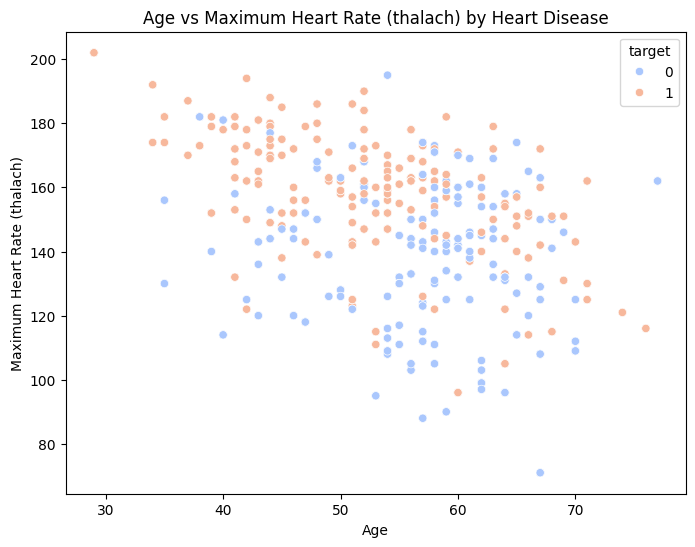

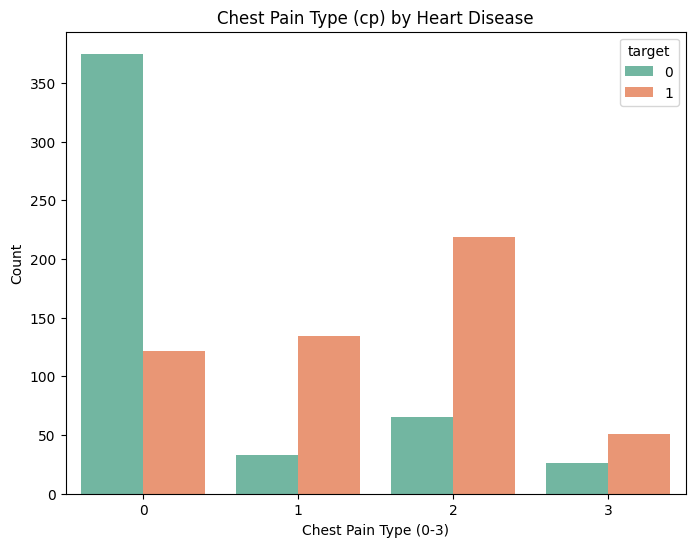

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11128\2790607608.py:61: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x='target', y='trestbps', data=df, palette='Set1')


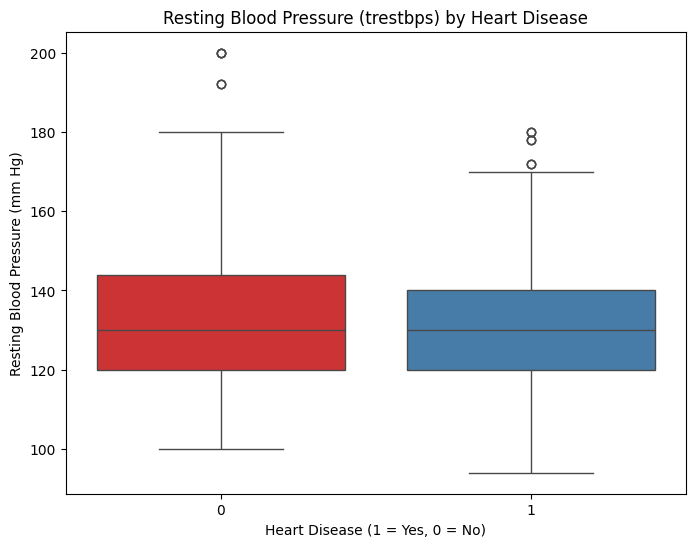

C:\Users\LENOVO\AppData\Local\Temp\ipykernel_11128\2790607608.py:69: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.violinplot(x='target', y='thalach', data=df, palette='coolwarm')


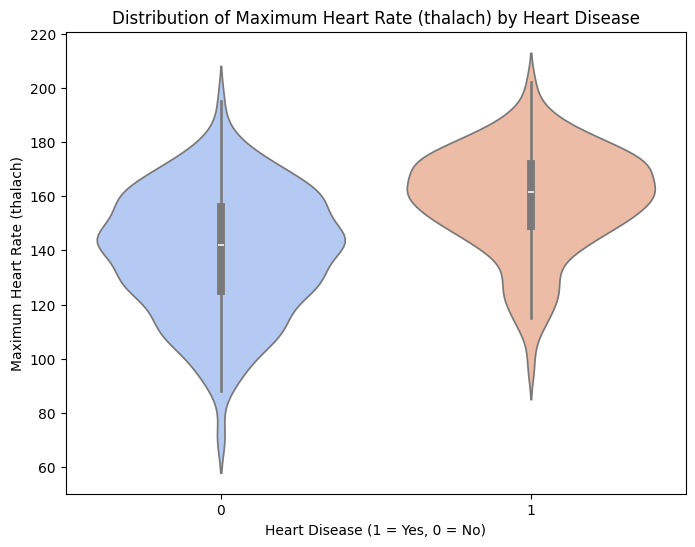

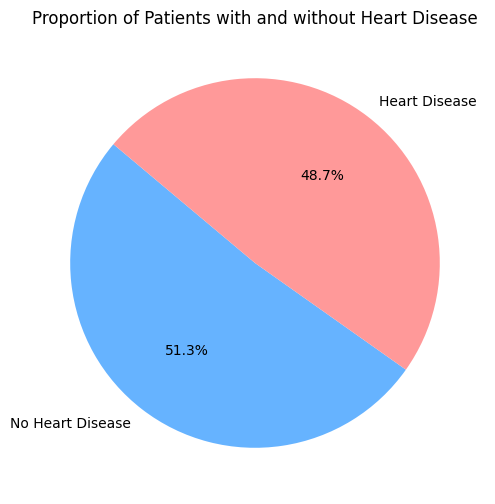

In [13]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns



# 1. Bar plot showing the distribution of heart disease (target variable)
plt.figure(figsize=(6,4))
sns.countplot(x='target', data=df, palette='Set2')
plt.title('Distribution of Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Count')
plt.show()

# 2. Histogram of age distribution for patients with and without heart disease
plt.figure(figsize=(10,6))
sns.histplot(data=df, x='age', hue='target', kde=True, bins=20, palette='coolwarm')
plt.title('Age Distribution by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Frequency')
plt.show()

# 3. Boxplot comparing cholesterol levels for patients with and without heart disease
plt.figure(figsize=(8,6))
sns.boxplot(x='target', y='chol', data=df, palette='Set3')
plt.title('Cholesterol Levels by Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Cholesterol (mg/dL)')
plt.show()

# 4. Pairplot to show relationships between key features (age, trestbps, chol, thalach) and heart disease
sns.pairplot(df[['age', 'trestbps', 'chol', 'thalach', 'target']], hue='target', palette='coolwarm')
plt.suptitle('Pairplot of Key Features by Heart Disease', y=1.02)
plt.show()

# 5. Heatmap showing the correlation matrix for all features
plt.figure(figsize=(12,8))
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='viridis', fmt='.2f')
plt.title('Correlation Matrix')
plt.show()

# 6. Scatter plot of age vs maximum heart rate (thalach) colored by heart disease
plt.figure(figsize=(8,6))
sns.scatterplot(x='age', y='thalach', hue='target', palette='coolwarm', data=df)
plt.title('Age vs Maximum Heart Rate (thalach) by Heart Disease')
plt.xlabel('Age')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.show()

# 7. Count plot of chest pain type (cp) by heart disease
plt.figure(figsize=(8,6))
sns.countplot(x='cp', hue='target', data=df, palette='Set2')
plt.title('Chest Pain Type (cp) by Heart Disease')
plt.xlabel('Chest Pain Type (0-3)')
plt.ylabel('Count')
plt.show()

# 8. Boxplot of resting blood pressure (trestbps) by heart disease
plt.figure(figsize=(8,6))
sns.boxplot(x='target', y='trestbps', data=df, palette='Set1')
plt.title('Resting Blood Pressure (trestbps) by Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Resting Blood Pressure (mm Hg)')
plt.show()

# 9. Violin plot showing the distribution of maximum heart rate (thalach) by heart disease
plt.figure(figsize=(8,6))
sns.violinplot(x='target', y='thalach', data=df, palette='coolwarm')
plt.title('Distribution of Maximum Heart Rate (thalach) by Heart Disease')
plt.xlabel('Heart Disease (1 = Yes, 0 = No)')
plt.ylabel('Maximum Heart Rate (thalach)')
plt.show()

# 10. Pie chart showing the proportion of patients with and without heart disease
heart_disease_counts = df['target'].value_counts()
labels = ['No Heart Disease', 'Heart Disease']
colors = ['#66b3ff','#ff9999']
plt.figure(figsize=(6,6))
plt.pie(heart_disease_counts, labels=labels, colors=colors, autopct='%1.1f%%', startangle=140)
plt.title('Proportion of Patients with and without Heart Disease')
plt.show()
